## Logistic Regression

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [152]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


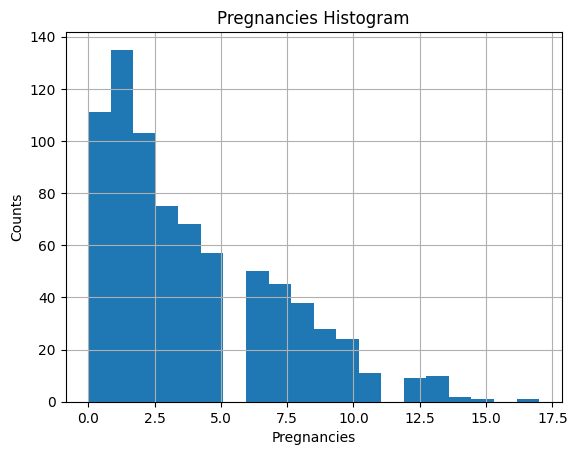

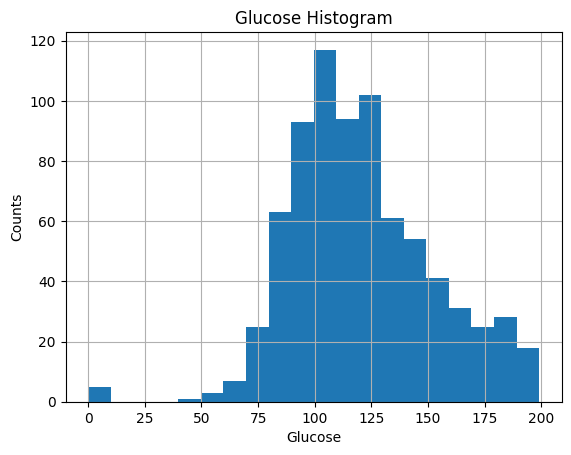

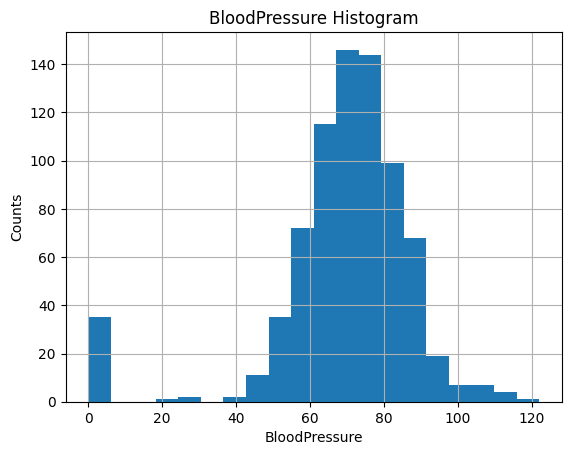

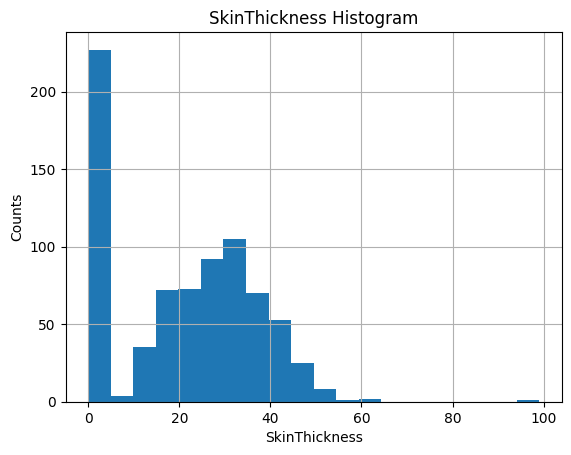

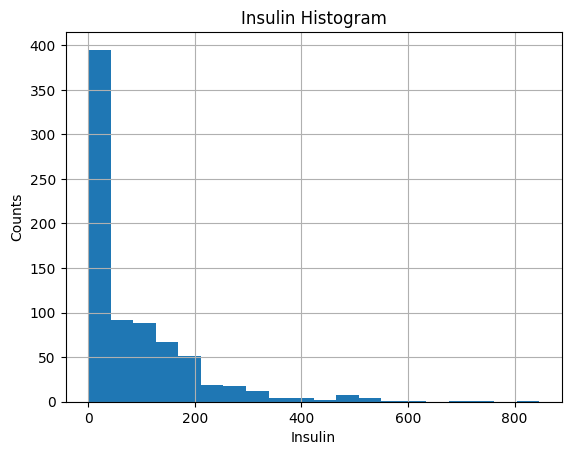

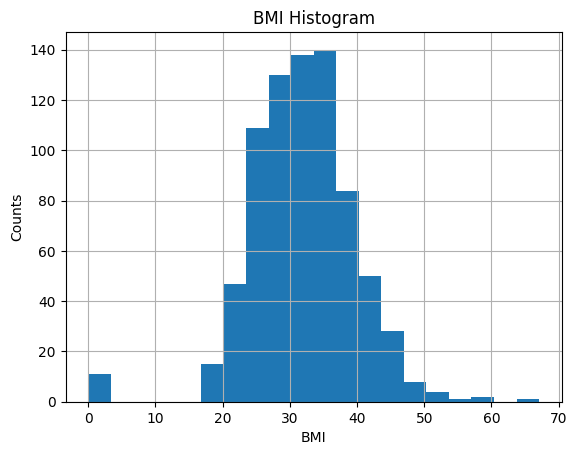

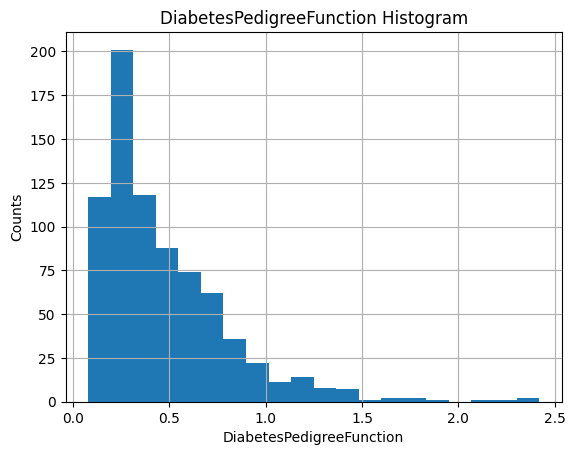

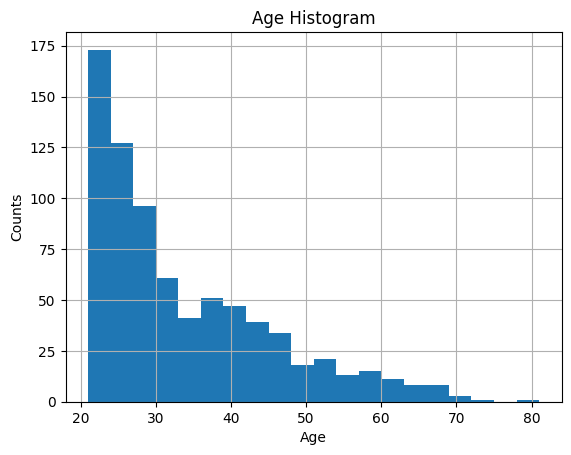

In [154]:
for feature in df.columns:
  if feature == 'Outcome': continue
  df[feature].hist(bins=20)
  plt.title(f'{feature} Histogram')
  plt.xlabel(feature)
  plt.ylabel('Counts')
  plt.show()
  print(' ')

Text(0.5, 1.0, 'Outcomes')

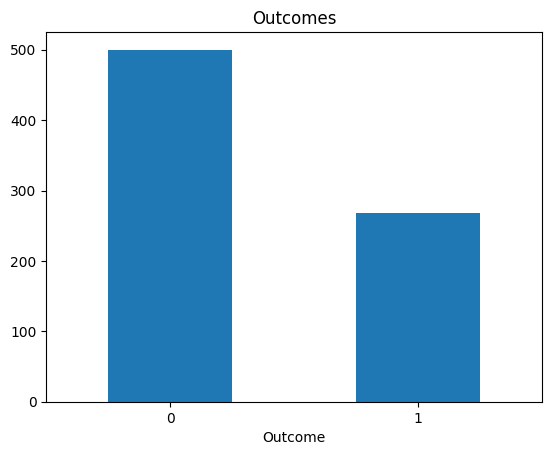

In [155]:
df['Outcome'].value_counts().plot.bar(rot=0)
plt.title('Outcomes')

The dataset is not of very high quality, with several inconsistencies and missing values.
- **Age Distribution**: The average age in the dataset is 33 years, while the 75th percentile is 44 years. The majority of individuals are under 40, leading to an asymmetric distribution. This imbalance may cause the model to perform better on younger individuals while being less effective for older ones, introducing a bias toward younger ages.

- **Missing and Zero Values**: Several features contain a significant number of missing or zero values, particularly:
    1. **Skin Thickness, Insulin, and Pregnancies**: These features show large spikes at zero, indicating potential missing data. While zero pregnancies may be justifiable due to the younger demographic, the presence of zeros in Insulin and Skin Thickness suggests data quality issues.

    2. **Blood Pressure**: While there are some missing values, they are not as prevalent as in the previously mentioned features.

- **Class Imbalance**: The dataset exhibits a slight imbalance in the target variable, with negative cases (0) being nearly twice as common as positive cases (1). This imbalance may cause the model to lean slightly towards predicting the majority class. However, the difference is not severe enough to cause major performance issues.

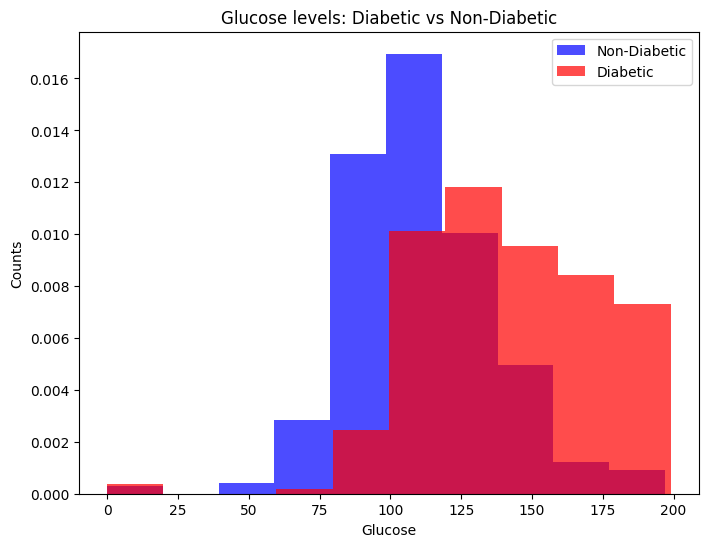

In [156]:
#Checking the relation between glucose levels and outcome
glucose_df = df.groupby('Outcome')['Glucose']
plt.figure(figsize=(8, 6))
plt.hist(df[df['Outcome'] == 0]['Glucose'], color='blue', label='Non-Diabetic', alpha=0.7, density=True)
plt.hist(df[df['Outcome'] == 1]['Glucose'], color='red', label='Diabetic', alpha=0.7, density=True)
plt.title('Glucose levels: Diabetic vs Non-Diabetic')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.legend()
plt.show()

According to clinical studies, patients with high glucose levels are significantly more likely to develop diabetes. This trend is also evident in the dataset, as the distribution of diabetic patients is shifted to the right.

In [157]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [158]:
df.shape, X.shape, Y.shape

((768, 9), (768, 8), (768,))

In [159]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [160]:
#Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [161]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [162]:
#Creating LR model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [163]:
Y_predict = model.predict(X_test)
accuracy = accuracy_score(Y_predict, Y_test)
print('Accuracy score of LR model without scaling:', accuracy)

Accuracy score of LR model without scaling: 0.7792207792207793


For this particular application, I believe it is preferable to have false positives—incorrectly predicting that a patient has diabetes when they do not—rather than false negatives, where the model fails to detect diabetes. Missing a diagnosis could put the patient at risk by overlooking a serious condition. Therefore "recall" would be the preffered metric.

In [164]:
#Function to split the data based on age
def split_data_by_age(X, Y):
  X = X.join(Y)
  under_25 = X[X['Age'] <= 25]
  under_50 = X[(X['Age'] > 25) & (X['Age'] <= 50)]
  over_50 = X[X['Age'] > 50]
  X_under25 = under_25.drop(columns='Outcome')
  Y_under25 = under_25['Outcome']
  X_under50 = under_50.drop(columns='Outcome')
  Y_under50 = under_50['Outcome']
  X_over50 = over_50.drop(columns='Outcome')
  Y_over50 = over_50['Outcome']
  return X_under25, Y_under25, X_under50, Y_under50, X_over50, Y_over50

In [165]:
X_under25, Y_under25, X_under50, Y_under50, X_over50, Y_over50 = split_data_by_age(X_test, Y_test)

In [166]:
X_under25.shape, Y_under25.shape, X_under50.shape, Y_under50.shape, X_over50.shape, Y_over50.shape, X_test.shape #Checking if dimensions add up

((90, 8), (90,), (120, 8), (120,), (21, 8), (21,), (231, 8))

Accuracy in ages below 25:  0.8555555555555555
Accuracy in ages between 25 and 50:  0.7
Accuracy in ages over 50:  0.9047619047619048 



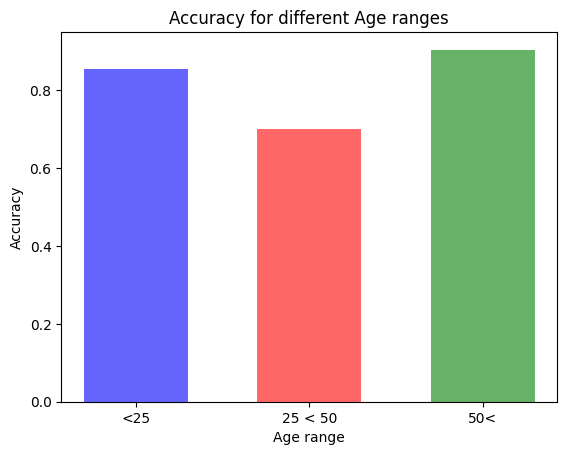

In [167]:
accuracy_under25 = accuracy_score(model.predict(X_under25), Y_under25)
accuracy_under50 = accuracy_score(model.predict(X_under50), Y_under50)
accuracy_over50 = accuracy_score(model.predict(X_over50), Y_over50)
print('Accuracy in ages below 25: ', accuracy_under25)
print('Accuracy in ages between 25 and 50: ', accuracy_under50)
print('Accuracy in ages over 50: ', accuracy_over50, '\n')

labels = ['<25', '25 < 50', '50<']
accuracies = [accuracy_under25, accuracy_under50, accuracy_over50]
plt.bar(labels, accuracies, color=['blue', 'red', 'green'], alpha=0.6 ,width=0.6)
plt.title('Accuracy for different Age ranges')
plt.xlabel('Age range')
plt.ylabel('Accuracy')
plt.show()

In [169]:
# Using SAGA solver -------------------------------------------------------------------------------
penalty_lst = np.array(['l1', 'l2', 'elasticnet'])
accuracies = []

for pen in penalty_lst:
    if pen == 'elasticnet':
        # Specify l1_ratio when using elasticnet
        model = LogisticRegression(max_iter=2000, solver='saga', penalty=pen, l1_ratio=0.5, random_state=0)
    else:
        # No l1_ratio for other penalties
        model = LogisticRegression(max_iter=2000, solver='saga', penalty=pen, random_state=0)

    model.fit(X_train, Y_train)

    Y_predict = model.predict(X_test)
    accuracies.append(accuracy_score(Y_predict, Y_test))

# Using LBFGS solver -------------------------------------------------------------------------------
model = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', random_state=0)
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
accuracies.append(accuracy_score(Y_predict, Y_test))

# Using liblinear solver ----------------------------------------------------------------------------
for pen in ['l1', 'l2']:
  model = LogisticRegression(max_iter=1000, solver='liblinear', penalty=pen, random_state=0)
  model.fit(X_train, Y_train)
  Y_predict = model.predict(X_test)
  accuracies.append(accuracy_score(Y_predict, Y_test))

print(accuracies, '\n')

[0.7402597402597403, 0.7359307359307359, 0.7359307359307359, 0.7792207792207793, 0.7835497835497836, 0.7835497835497836] 



[0.7402597402597403, 0.7359307359307359, 0.7359307359307359, 0.7792207792207793, 0.7835497835497836, 0.7835497835497836] 



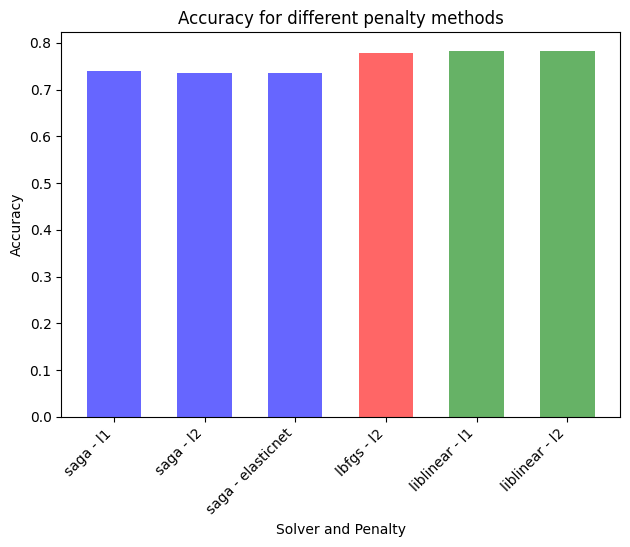

In [170]:
labels = ['saga - l1', 'saga - l2', 'saga - elasticnet', 'lbfgs - l2', 'liblinear - l1', 'liblinear - l2']
print(accuracies, '\n')
plt.bar(labels, accuracies, color=['blue', 'blue', 'blue', 'red', 'green', 'green'],alpha=0.6 ,width=0.6)
plt.title('Accuracy for different penalty methods')
plt.xlabel('Solver and Penalty')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

The best accuracy is achieved by liblinear solver.

In [171]:
seeds = np.arange(1, 10)
accuracies = []

for i in seeds:
  model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', random_state=i)
  model.fit(X_train, Y_train)
  Y_predict = model.predict(X_test)
  accuracies.append(accuracy_score(Y_predict, Y_test))

print(accuracies)

[0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836, 0.7835497835497836]


In [172]:
accuracies = np.array(accuracies)
print('Accuracy Mean:', accuracies.mean())
print('Accuracy Standard Deviation:', accuracies.std())

Accuracy Mean: 0.7835497835497836
Accuracy Standard Deviation: 0.0


## Linear Regression

In [173]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [174]:
X = df.drop(columns=['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'])
Y = df['Insulin']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [175]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((537, 4), (537,), (231, 4), (231,))

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_predict)
print('MSE result in test data:', MSE)

MSE result in test data: 10883.737319676153


For this model, the most suitable metric is Mean Squared Error (MSE) because, in medical applications like insulin prediction, outliers are particularly important. MSE penalizes large errors more heavily, making it a better choice for this scenario.

In insulin prediction, significant errors can have serious consequences, such as a patient not receiving the necessary treatment. Therefore, our goal is to minimize large errors as much as possible.

coefficients: [-2.35327292  0.22690636  2.60863733 -0.34375148] 



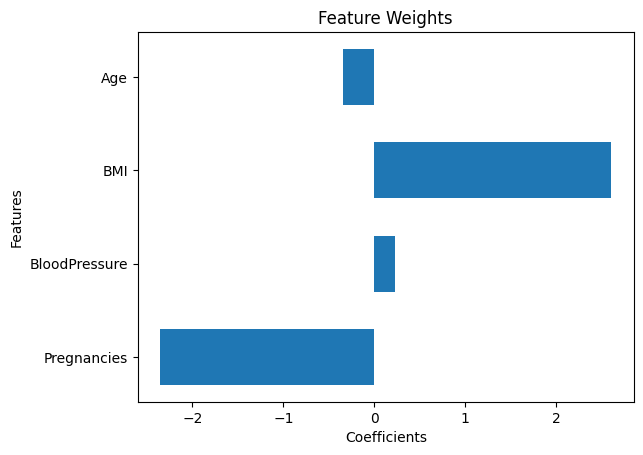

In [177]:
coeffic = model.coef_
features = X.columns

print('coefficients:', coeffic, '\n')
plt.barh(features, coeffic, height=0.6)
plt.title('Feature Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

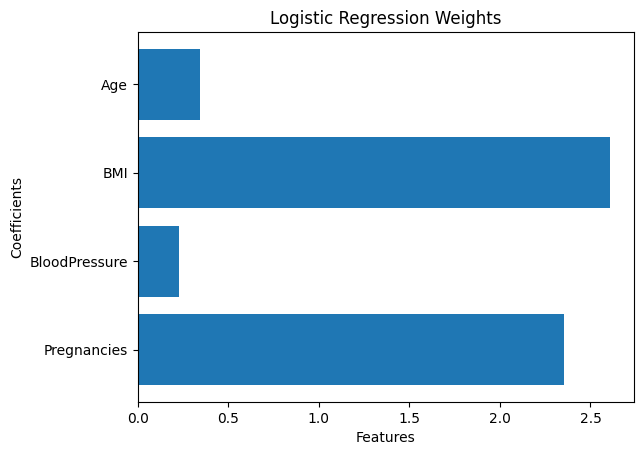

In [178]:
plt.barh(features, np.abs(coeffic))
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

It appears that pregnancies and BMI have the greatest influence on insulin prediction. However, this may not be entirely representative, as the features are on different scales.

If one feature has values between 1 and 5 and another between 100 and 300, the second feature will typically have a smaller coefficient because the scale is much larger. However, this doesn't necessarily mean it has less impact on the prediction—it just means its coefficient is adjusted according to its scale.

To properly compare feature importance, standardization is needed-If we standardize the features (e.g., using z-score normalization or min-max scaling), we can ensure that their coefficients are comparable in magnitude.

[10883.73731968 10883.99153323 10884.25292796 10884.52181776
 10884.79820265 10885.08208263] 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.604e+06, tolerance: 7.539e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Text(0, 0.5, 'MSE')

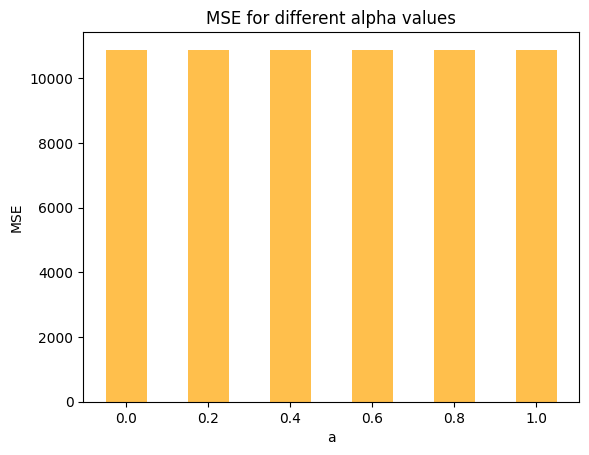

In [179]:
from sklearn.linear_model import Lasso

alpha_values = np.arange(0, 1.1, 0.2)
mse_results = []

for a in alpha_values:
  model = Lasso(alpha=a)
  model.fit(X_train, Y_train)

  Y_predict = model.predict(X_test)
  mse_results.append(mean_squared_error(Y_test, Y_predict))

mse_results = np.array(mse_results)

print(mse_results, '\n')
plt.bar(alpha_values, mse_results, color='orange', alpha=0.7, width=0.1)
plt.title('MSE for different alpha values')
plt.xlabel('a')
plt.ylabel('MSE')

Among the six models, the one with α = 0 (i.e., plain linear regression) appears to have the lowest error. The most important feature, based on its weight, is BMI.

In [180]:
X.drop(columns='BloodPressure', inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((537, 3), (537,), (231, 3), (231,))

In [181]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)
print('MSE result with "BloodPressure":', MSE)
MSE = mean_squared_error(Y_test, Y_predict)
print('MSE result without "Blood Pressure:', MSE)

MSE result with "BloodPressure": 10883.737319676153
MSE result without "Blood Pressure: 10943.206985202194


The error appears to be slightly lower when blood pressure is included as a feature, but the difference is so small that it is unlikely to have a significant impact on the results.